In [331]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
from datetime import date
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model as skl_lm

In [213]:
#Reading the file- where missing values is filled in ETL,Visualization notebook
data=pd.read_csv("MarketSales-Filled.csv",encoding='latin1')

In [214]:
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCE42,12.857645,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648
1,FDQ19,12.857645,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.5600
2,FDZ20,12.857645,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Medium,Tier 3,Supermarket Type3,11445.1020
3,FDP33,12.857645,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Medium,Tier 3,Supermarket Type3,10993.6896
4,FDI50,12.857645,Regular,0.030693,Canned,228.0352,OUT027,1985,Medium,Tier 3,Supermarket Type3,10306.5840


In [215]:
#Removing Identifiers-Item_Identifier and Outlet_Identifier
data=data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,12.857645,Low Fat,0.010551,Household,234.9958,1985,Medium,Tier 3,Supermarket Type3,13086.9648
1,12.857645,Regular,0.014296,Fruits and Vegetables,242.6512,1985,Medium,Tier 3,Supermarket Type3,12117.5600
2,12.857645,Low Fat,0.000000,Fruits and Vegetables,253.0356,1985,Medium,Tier 3,Supermarket Type3,11445.1020
3,12.857645,Low Fat,0.088840,Snack Foods,254.2672,1985,Medium,Tier 3,Supermarket Type3,10993.6896
4,12.857645,Regular,0.030693,Canned,228.0352,1985,Medium,Tier 3,Supermarket Type3,10306.5840


In [216]:
#Checking for missing values
data.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [186]:
data.shape

(8523, 11)

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 732.6+ KB


In [188]:
#Let me check for Categorical columns
#Can be done in 2 way, either including object data types or by excluding int and float data types
data.select_dtypes(include=['object']).dtypes

Item_Fat_Content        object
Item_Type               object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

There are 5 columns with categorical data. Let's try the other way by excluding numerical data

In [189]:
data.select_dtypes(exclude = ['float64', 'int64']).dtypes

Item_Fat_Content        object
Item_Type               object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

Same output is observed

In [217]:
#Let's do one-hot encoding for this Categorical data
data_onehot = data.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['Item_Fat_Content'], prefix = ['Item_Fat_Content'])
data_onehot = data_onehot.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['Item_Type'], prefix = ['Item_Type'])
data_onehot = data_onehot.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['Outlet_Size'], prefix = ['Outlet_Size'])
data_onehot = data_onehot.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['Outlet_Location_Type'], prefix = ['Outlet_Location_Type'])
data_onehot = data_onehot.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['Outlet_Type'], prefix = ['Outlet_Type'])

#Can also perform one-hot encoding using following single line of code

data_onehot_new=pd.get_dummies(data=data, columns=['Item_Fat_Content', 'Item_Type','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'])


In [218]:
data_onehot.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,12.857645,0.010551,234.9958,1985,13086.9648,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,12.857645,0.014296,242.6512,1985,12117.5600,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,12.857645,0.000000,253.0356,1985,11445.1020,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,12.857645,0.088840,254.2672,1985,10993.6896,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,12.857645,0.030693,228.0352,1985,10306.5840,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [219]:
data_onehot_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,12.857645,0.010551,234.9958,1985,13086.9648,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,12.857645,0.014296,242.6512,1985,12117.5600,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,12.857645,0.000000,253.0356,1985,11445.1020,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,12.857645,0.088840,254.2672,1985,10993.6896,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,12.857645,0.030693,228.0352,1985,10306.5840,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [220]:
data=data_onehot.copy()

In [221]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,12.857645,0.010551,234.9958,1985,13086.9648,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,12.857645,0.014296,242.6512,1985,12117.5600,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,12.857645,0.000000,253.0356,1985,11445.1020,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,12.857645,0.088840,254.2672,1985,10993.6896,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,12.857645,0.030693,228.0352,1985,10306.5840,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [222]:
#Let's covert year to age 
today = date.today() 
Age = today.year - data['Outlet_Establishment_Year']
data['Outlet_Establishment_Year'] = Age

In [223]:
data.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,12.857645,0.010551,234.9958,35,13086.9648,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,12.857645,0.014296,242.6512,35,12117.5600,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,12.857645,0.000000,253.0356,35,11445.1020,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,12.857645,0.088840,254.2672,35,10993.6896,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,12.857645,0.030693,228.0352,35,10306.5840,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
5,14.850000,0.019495,261.2910,33,10256.6490,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
6,12.857645,0.034584,248.3750,35,10236.6750,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
7,12.857645,0.044445,245.2802,35,10072.8882,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,6.825000,0.059847,262.5226,23,9779.9362,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
9,12.857645,0.015386,208.9928,35,9678.0688,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [224]:
#Let me do Linearity check
d=data.copy()
X=d.drop(['Item_Outlet_Sales'], axis=1)
Y=d.filter(['Item_Outlet_Sales'], axis=1)

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)

In [226]:
X_with_constant=sm.add_constant(X_train)
model=sm.OLS(y_train,X_with_constant)

In [200]:
results=model.fit()
results.params

const                               633.598484
Unnamed: 0                           -0.001842
Item_Weight                           0.212746
Item_Visibility                    -514.074568
Item_MRP                             15.475013
Outlet_Establishment_Year           -48.331930
Item_Fat_Content_Low Fat            288.920860
Item_Fat_Content_Regular            344.677624
Item_Type_Baking Goods               43.340035
Item_Type_Breads                      8.440875
Item_Type_Breakfast                  84.654128
Item_Type_Canned                     76.558358
Item_Type_Dairy                     -18.949391
Item_Type_Frozen Foods               53.053510
Item_Type_Fruits and Vegetables     103.372635
Item_Type_Hard Drinks               -24.328987
Item_Type_Health and Hygiene          4.705710
Item_Type_Household                   9.341154
Item_Type_Meat                       46.403499
Item_Type_Others                    -20.470238
Item_Type_Seafood                    70.990654
Item_Type_Sna

In [227]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     313.2
Date:                Fri, 22 May 2020   Prob (F-statistic):               0.00
Time:                        12:41:23   Log-Likelihood:                -57570.
No. Observations:                6818   AIC:                         1.152e+05
Df Residuals:                    6789   BIC:                         1.154e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [230]:
X_test=sm.add_constant(X_test)

In [ ]:
y_pred=results.predict(X_test)

In [235]:
y_pred=pd.DataFrame(y_pred, columns=['Item_Outlet_Sales'])
y_pred

,Item_Outlet_Sales
2344,1659.664976
4005,1707.006099
2897,1626.936041
6252,776.794838
6414,686.702038
...,...
5392,985.224583
2036,3703.380417
5963,2846.306039
6867,2364.804055


In [236]:
y_test

,Item_Outlet_Sales
2344,2942.8360
4005,1922.8304
2897,2579.3092
6252,892.1720
6414,822.2630
...,...
5392,1278.3360
2036,3169.2080
5963,1022.6688
6867,647.1576


In [237]:
residual=y_test-y_pred
residual

,Item_Outlet_Sales
2344,1283.171024
4005,215.824301
2897,952.373159
6252,115.377162
6414,135.560962
...,...
5392,293.111417
2036,-534.172417
5963,-1823.637239
6867,-1717.646455


Assumptions of Linear Regression
    1) No Multi Collinearity
    2) Normality of Residuals
    3) Homoscedasticity
    4) No auto correlation

                                        Multi Collinearity

Multi Collinearity -In statistics, multicollinearity is a phenomenon in which one predictor variable in a multiple regression model 
can be linearly predicted from the others with a substantial degree of accuracy.
Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because 
independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems 
when you fit the model and interpret the results.

In [238]:
# if vif>10----high multi collinearity
vif=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif':vif[0:]},index=X_train.columns).T
#vif is observed ad Infinity for many of the columns

C:\Users\Gowri.Bollineni01\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
vif,1.014479,1.106798,1.015415,48.727573,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


                                        Normality of Residuals

Normality of Residuals- In order to make valid inferences from your regression, the residuals of the regression should follow
a normal distribution. The residuals are simply the error terms, or the differences between the observed value of the dependent 
variable and the predicted value

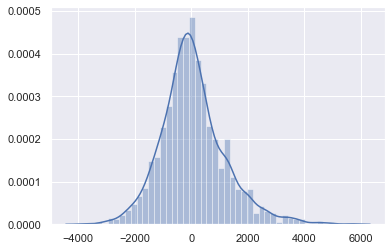

In [239]:
sns.distplot(residual)
#Mear normal distribution

Normality can also be predicted using residual mean, it should be less

In [240]:
#mean should be very small
np.mean(residual)

Item_Outlet_Sales    66.436697
dtype: float64

                                            Homoscedasticity

Homoscedasticity - This assumption means that the variance around the regression line is the same for all values
of the predictor variable (X).

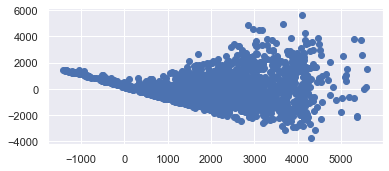

In [241]:
fig, ax=plt.subplots(figsize=(6,2.5))
_=ax.scatter(y_pred,residual)
#there is no pattern and some values are centered towards 0

                                        No auto correlation of residuals

Autocorrelation is the correlation of a time Series with lags of itself. When the residuals are autocorrelated, 
it means that the current value is dependent of the previous (historic) values and that there is a definite
unexplained pattern in the Y variable that shows up in the disturbances

C:\Users\Gowri.Bollineni01\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


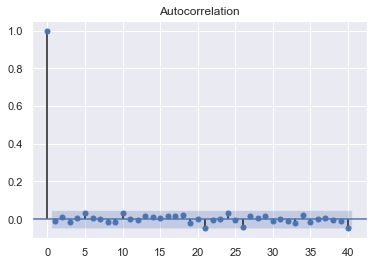

In [242]:
acf=smt.graphics.plot_acf(residual,lags=40,alpha=0.05)
acf.show()

Blue border shows significance level, no points cross that significance level.
first line is self auto correlated point.

                                    Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response and one or more
explanatory variables. The case of one explanatory variable is called simple linear regression. For more than one explanatory
variable, the process is called multiple linear regression.

In [243]:
lin_reg_mod = LinearRegression()

In [244]:
lin_reg_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [245]:
X_test=X_test.drop(['const'],axis=1)

In [246]:
pred = lin_reg_mod.predict(X_test)

                        Various Metrics used to evaluate results of prediction in Regression

1) Root Mean Squared Error- RMSE is the most widely used metric for regression tasks and is the square root of the averaged
squared difference between the target value and the value predicted by the model. It is preferred more in some cases because
the errors are first squared before averaging which poses a high penalty on large errors. This implies that RMSE is useful 
when large errors are undesired.

In [247]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, pred))

1143.7037431013396

Mean Absolute Error - MAE is the absolute difference between the target value and the value predicted by the model. The MAE is
more robust to outliers and does not penalize the errors as extremely as mse. MAE is a linear score which means all the 
individual differences are weighted equally. It is not suitable for applications where you want to pay more attention to the
outliers.

In [248]:
#Mean Absolute Error
metrics.mean_absolute_error(y_test, pred)

846.1186651952079

Mean Squared Error- MSE or Mean Squared Error is one of the most preferred metrics for regression tasks. It is simply the 
average of the squared difference between the target value and the value predicted by the regression model. As it squares 
the differences, it penalizes even a small error which leads to over-estimation of how bad the model is. It is preferred more 
than other metrics because it is differentiable and hence can be optimized better.

In [249]:
#Mean Squared Error
metrics.mean_squared_error(y_test, pred)

1308058.2519840149

R-Square Score- Coefficient of Determination or R² is another metric used for evaluating the performance of a regression model.
The metric helps us to compare our current model with a constant baseline and tells us how much our model is better. The constant
baseline is chosen by taking the mean of the data and drawing a line at the mean. R² is a scale-free score that implies it 
doesn't matter whether the values are too large or too small, the R² will always be less than or equal to 1.

In [250]:
#R-Square Score
r2_score(y_test, pred)

0.5597030359648008

                                        Ridge Regression

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When
multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from
the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.
It is hoped that the net effect will be to give estimates that are more reliable

In [260]:
RR = Ridge(alpha=0.05, normalize=True)
RR.fit(X_train,y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [261]:
y_pred_RR = RR.predict(X_test)

In [265]:
#Mean Absolute Error
metrics.mean_absolute_error(y_test, y_pred_RR)

844.2536837065371

In [266]:
#Mean Squared Error
metrics.mean_squared_error(y_test, y_pred_RR)

1313757.0135867419

In [268]:
#Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, y_pred_RR))

1146.192398154316

In [269]:
# r2 Score
RR.score(X_test,y_test)

0.5577848129585736

In [506]:
pred1=pd.DataFrame(y_pred_RR)
pred1.head(5)

,0
0,1802.512202
1,1702.477914
2,1644.306946
3,847.172615
4,735.928517


                                        Lasso Regression

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients.
This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated
from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models.
On the other hand, L2 regularization (e.g. Ridge regression) doesn’t result in elimination of coefficients or sparse models.
This makes the Lasso far easier to interpret than the Ridge.

In [282]:
LR = Lasso(alpha=0.3, normalize=True)
LR.fit(X_train,y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [283]:
LR_y_pred = LR.predict(X_test)

In [286]:
#Mean Absolute Error:
metrics.mean_absolute_error(y_test, LR_y_pred)

838.8082207843047

In [287]:
#Mean Squared Error:
metrics.mean_squared_error(y_test, LR_y_pred)

1296066.7039555053

In [288]:
#Root Mean Squared Error:
np.sqrt(metrics.mean_squared_error(y_test, LR_y_pred))

1138.4492540098154

In [289]:
#R2 Score:
LR.score(X_test,y_test)

0.5637394328018888

In [508]:
pred2=pd.DataFrame(LR_y_pred)
pred2.head(5)

,0
0,1852.586638
1,1706.897042
2,1651.962504
3,817.475959
4,734.020015


                                        PCA-Principle Component Analysis

Given a collection of points in two, three, or higher dimensional space, a "best fitting" line can be defined as one
that minimizes the average squared distance from a point to the line. The next best-fitting line can be similarly 
chosen from directions perpendicular to the first. Repeating this process yields an orthogonal basis in which different
individual dimensions of the data are uncorrelated. These basis vectors are called principal components, and several 
related procedures principal component analysis (PCA).

In [ ]:
p_c_a = PCA(n_components = 5) 

In [292]:
pca_X_train = p_c_a.fit_transform(X_train) 
pca_X_test = p_c_a.transform(X_test) 

In [293]:
lin_reg_mod.fit(pca_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [294]:
pca_y_pred = lin_reg_mod.predict(pca_X_test)

In [296]:
#Mean Absolute Error
metrics.mean_absolute_error(y_test, pca_y_pred)

1031.6143143683948

In [297]:
#Mean Squared Error
metrics.mean_squared_error(y_test, pca_y_pred)

1976106.3899362928

In [298]:
#Root Mean Squared Error:
np.sqrt(metrics.mean_squared_error(y_test, pca_y_pred))

1405.7405130166424

In [299]:
#Score
lin_reg_mod.score(pca_X_test,y_test)

0.3348357056883273

Let's take 10 components

In [308]:
p_c_a = PCA(n_components = 10) 

In [309]:
pca_X_train = p_c_a.fit_transform(X_train) 
pca_X_test = p_c_a.transform(X_test) 

In [310]:
lin_reg_mod.fit(pca_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [311]:
pca_y_pred = lin_reg_mod.predict(pca_X_test)

In [312]:
#Mean Absolute Error
metrics.mean_absolute_error(y_test, pca_y_pred)

1005.36225340669

In [313]:
#Mean Squared Error
metrics.mean_squared_error(y_test, pca_y_pred)

1806668.5184064854

In [315]:
#Root Mean Squared Error:
np.sqrt(metrics.mean_squared_error(y_test, pca_y_pred))

1344.1236990718098

In [317]:
#Score
lin_reg_mod.score(pca_X_test,y_test)

0.39186908345572047

Let's take 20 components

In [320]:
p_c_a = PCA(n_components = 20) 

In [321]:
pca_X_train = p_c_a.fit_transform(X_train) 
pca_X_test = p_c_a.transform(X_test) 

In [322]:
lin_reg_mod.fit(pca_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [323]:
pca_y_pred = lin_reg_mod.predict(pca_X_test)

In [324]:
#Mean Absolute Error
metrics.mean_absolute_error(y_test, pca_y_pred)

842.1859412047086

In [325]:
#Mean Squared Error
metrics.mean_squared_error(y_test, pca_y_pred)

1303228.5527275892

In [326]:
#Root Mean Squared Error:
np.sqrt(metrics.mean_squared_error(y_test, pca_y_pred))

1141.590361174966

In [334]:
#Score
lin_reg_mod.score(pca_X_test,y_test)

0.5613287295580195

In [509]:
pred3=pd.DataFrame(pca_y_pred)
pred3.head(5)

,0
0,1897.468104
1,1669.865693
2,1584.498845
3,775.178691
4,703.199597


                                        Cross Validation

cross validation-Cross Validation is a very useful technique for assessing the effectiveness of your model,
particularly in cases where you need to mitigate overfitting. It is also of use in determining the hyper parameters
of your model, in the sense that which parameters will result in lowest test error.

K-Fold Cross Validation-In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k 
times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put 
together to form a training set,This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set
As a general rule and empirical evidence, K = 5 or 10 is generally preferred

In [337]:
cross_val_score(RR, X, Y, cv=10)

array([  -5.80051444,  -12.02304995,  -16.10440935,  -20.84247989,
        -43.22149642,  -64.87513677,  -93.75578712, -100.0993587 ,
       -129.64746888, -143.43175143])

In [388]:
scores = []
cv = KFold(n_splits=10, random_state=None,shuffle=False)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]
    RR.fit(X_train, y_train)
    scores.append(RR.score(X_test, y_test))
scores

[-5.800514438904637,
 -12.023049951926525,
 -16.104409351794367,
 -20.842479888816374,
 -43.22149641779176,
 -64.87513676948204,
 -93.75578712335971,
 -100.09935870261343,
 -129.64746887859096,
 -143.43175143318214]

Stratified K-Fold Cross Validation-a slight variation in the K Fold cross validation technique is made, such that each fold 
contains approximately the same percentage of samples of each target class as the complete set, or in case of prediction 
problems, the mean response value is approximately equal in all the folds. This variation is also known as Stratified K Fold.


Leave-P-Out Cross Validation-This approach leaves p data points out of training data, i.e. if there are n data points in the 
original sample then, n-p samples are used to train the model and p points are used as the validation set. This is repeated for
all combinations in which original sample can be separated this way, and then the error is averaged for all trials, to give 
overall effectiveness.
A particular case of this method is when p = 1. This is known as Leave one out cross validation.
This method is generally preferred over the previous one because it does not suffer from the intensive computation, 
as number of possible combinations is equal to number of data points in original sample or n.


                                        Regression Boosting Techniques

In [ ]:
#Gradient Boosting Regression

In [390]:
#grad descent
GBR = GradientBoostingRegressor(n_estimators=3, max_depth=3,learning_rate=1, criterion='mse')
GBR.fit(X_train,y_train.values.ravel()) 
GBR_y_pred = GBR.predict(X_test)

In [486]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, GBR_y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, GBR_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, GBR_y_pred)))

Mean Absolute Error: 487.52716839991444
Mean Squared Error: 363779.5163825049
Root Mean Squared Error: 603.1413734627272


In [ ]:
#Ada Boost

In [461]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(X_train, y_train)

C:\Users\Gowri.Bollineni01\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [462]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [485]:
print('Mean Absolute Error:', metrics.mean_absolute_error(expected_y, predicted_y)) 
print('Mean Squared Error:', metrics.mean_squared_error(expected_y, predicted_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(expected_y, predicted_y)))

Mean Absolute Error: 1653.5262716771786
Mean Squared Error: 2934912.6768860742
Root Mean Squared Error: 1713.1586840938216


Let's plot performance metrics for above Regression methods

In [497]:
df = {'Regression type':['Linear','Ridge','Lasso','PCA_5','PCA_10','PCA_20','GradientBoost'],'MeanAbsErr':[846.118,844.25,838.80,1031.61,1005,842,487.52],'MeanSqErr':[1308058.25,1313757.01,1296066.70,1976106,1806668,1303228,363779.51],'RootMeanSqrErr':[1143.70,1146.19,1138.44,1405,1344,1141,603.14]}

In [498]:
df=pd.DataFrame(df)

In [499]:
df

,Regression type,MeanAbsErr,MeanSqErr,RootMeanSqrErr
0,Linear,846.118,1308058.25,1143.70
1,Ridge,844.250,1313757.01,1146.19
2,Lasso,838.800,1296066.70,1138.44
3,PCA_5,1031.610,1976106.00,1405.00
4,PCA_10,1005.000,1806668.00,1344.00
5,PCA_20,842.000,1303228.00,1141.00
6,GradientBoost,487.520,363779.51,603.14


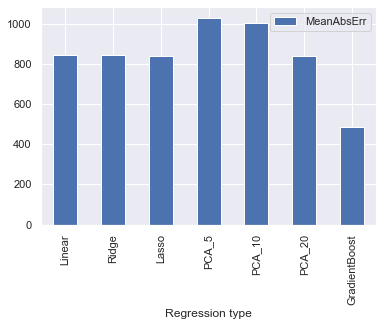

In [500]:
df.plot(x='Regression type', y='MeanAbsErr', kind='bar') 
plt.show()

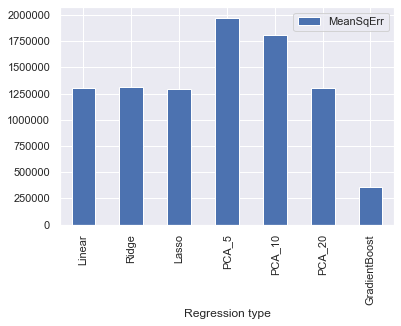

In [501]:
df.plot(x='Regression type', y='MeanSqErr', kind='bar') 
plt.show()

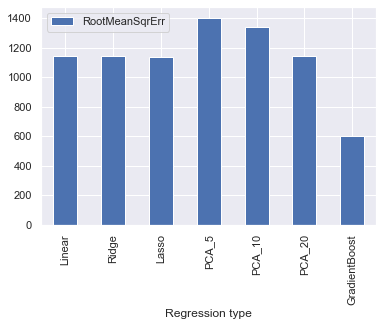

In [502]:
df.plot(x='Regression type', y='RootMeanSqrErr', kind='bar') 
plt.show()

Bias Variance Tradeoff

Bias-Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. 
Variance-Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. 

Bias Variance Trade-off is tension between the error introduced by the bias and the variance

In [511]:
#first 5 colums from Ridge Regression prediction
pred1.head(5)

,0
0,1802.512202
1,1702.477914
2,1644.306946
3,847.172615
4,735.928517


In [512]:
#first 5 colums from Lasso Regression prediction
pred2.head(5)

,0
0,1852.586638
1,1706.897042
2,1651.962504
3,817.475959
4,734.020015


In [513]:
#first 5 colums from  PCA prediction
pred3.head(5)

,0
0,1897.468104
1,1669.865693
2,1584.498845
3,775.178691
4,703.199597


In [514]:
#this is the actual values
y_test.head()

,Item_Outlet_Sales
7671,341.5554
7672,341.5554
7673,341.5554
7674,341.5554
7675,340.8896


In [515]:
#If the output generated by each model on the input A is different(B1, B2, B3), the algorithm is said to have a high Variance Error.
#from the above results, there is no much difference between values, so we can conclude that they have less variance error

In [ ]:
#if the output from all the three models is same (B) but incorrect, the algorithm is said to have a high Bias Error.
#There is lot more difference between actual values and predicted values, we can say that these models have high bias

In [ ]:
#Total Error can be calculated as sum of bias square and variance and irreducable error